# Workshop 01 - Introduction to Pandas & Scikit-Learn

In [1]:
# Imports
import os
import pandas as pd
import numpy as np

In [2]:
# depending on where the ipython kernel was started, we need to switch directories
if 'Workshop' in os.getcwd():
    print(f'Dir: {os.getcwd()}')
    print('Going up a level...')
    os.chdir('..')
    print(f'Dir: {os.getcwd()}')

Dir: /Users/janik/source/AAA_2025/Workshop_01
Going up a level...
Dir: /Users/janik/source/AAA_2025


## Content

+ Core Concepts
+ Reading Files
+ Fundamental Operations 
    1. Viewing Data Frames
    2. General Information about a Data Frame
    3. Summary Statistics of a Data Frame 
    4. Slicing and Extraction 
    
+ Machine Learning with Scikit-Learn

### Core Concepts: Series and DataFrames

In [3]:
# Note: A series represents a "column" - a data frame is a collection of multiple series

# Let's create a dict and transform it into a data frame
data = {
    'grade': [1, 2, 3, 1],
    'mat_id': ['45', '12', '14', '15']
}

# Creates a dictionary
df = pd.DataFrame(data)

In [4]:
# Display the content of data frame
df

,grade,mat_id
0,1,45
1,2,12
2,3,14
3,1,15


In [5]:
# Customize the index of the data frame (which is helpful if we want to select certain rows)

df = pd.DataFrame(data, index=['Julia', 'Peter', 'Ali', 'Nicole'])

# and display the content 
df

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


In [6]:
# Armed with this customized index, we can now "locate" rows by our custom index (student names)
df.loc['Nicole']

grade      1
mat_id    15
Name: Nicole, dtype: object

In [7]:
# Also, you can access the values (e.g., grade) directly
df.loc['Nicole'].grade

np.int64(1)

### Reading Files

Often, we don't generate our data in Python script but obtain data from other sources such as databases, datalakes, data warehouses etc. Thus, we need proper methods to read data from different kind of sources.

#### Reading CSV files

In [8]:
# You can pass either an absolute path or a relative path
# Relative to the current working directory (i.e., the directory from which the notebook was started)
df = pd.read_csv('./data/sample_data.csv') 

# Display content
df

,Unnamed: 0,grade,mat_id
0,Julia,1,45
1,Peter,2,12
2,Ali,3,14
3,Nicole,1,15


Since CSV files don't work with indexes, we have to specify it while reading the csv file.

In [9]:
df = pd.read_csv('./data/sample_data.csv', index_col=0) 

# Backup dataframe... (ignore this)
df_bak = df

# Voila
df

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


#### Reading JSON files

The vast majority of Internet communication is based on the JSON format. Reading and processing JSON files is thus crucial. 

In [10]:
# Lucky we: Pandas offers an easy-to-use method to read json files.
df = pd.read_json('./data/sample_data.json')

# Display content
df 

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


### Fundamental Operations

#### 1. Viewing data

In [11]:
# To get a first impression of the data, we can use the function head() - which returns us the first ten rows.
df.head()

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


In [12]:
# Of course, you can specify how many rows you want to obtain.
df.head(n=2) # or, for the sake of brevity, df.head(n)

,grade,mat_id
Julia,1,45
Peter,2,12


In [13]:
# Or all rows but the last line...
df.head(-1) # <-- Note, we passed a negative integer. 

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14


In [14]:
# Sometimes we are more interested in the last rows of a file. For example: log files

In [15]:
df.tail(n=2) # returns the last two rows

,grade,mat_id
Ali,3,14
Nicole,1,15


#### 2. Getting general info about your data 

Without discussion: this command should be executed right after loading the data

In [16]:
# Return an overview of your dataframe (incl. columns and their data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Julia to Nicole
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   grade   4 non-null      int64
 1   mat_id  4 non-null      int64
dtypes: int64(2)
memory usage: 96.0+ bytes


In [17]:
# The shape of your data is also a useful information

df.shape # return a tuple (n, m) where n is the number of rows and m the number of columns

(4, 2)

#### 3. Duplicates

Sorry to disappoint you but data will be messy in the real world. Duplicates are one of many example of unclean data.

In [18]:
print(pd.__version__)

2.2.3


In [19]:
# Artificially create a dataset with duplicates
# use 'ignore_index=False' to keep the index, even though there are duplicates
# use 'axis='index' to concat by rows (vs by columns)
# Using old version of pandas:
# df_dup = df.append(df)
# Using new version of pandas:
df_dup = pd.concat([df,df], ignore_index=False, axis='index')

#Display content
df_dup

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


In [20]:
# It is important to note that many data frame operations are not "in place" per default, 
# i.e., the original data frame remains untouched
df

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


In [21]:
# Now, let's get rid of duplicates
df_dup.drop_duplicates()

df_dup

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


In [22]:
# Something went wrong here...

# We have to assign the result of the drop_duplicates to our df_dup dataframe
# because this operation is not "inplace" per default 

df_dup = df_dup.drop_duplicates()

df_dup

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


In [23]:
# Okay - looks good, but sometimes this might be annoying or we don't have enough RAM.

# Again, artificially create a dataset with duplicates
df_dup = pd.concat([df,df])

# Drop Duplicates without reassigning the result
df_dup.drop_duplicates(inplace=True)

df_dup

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


In [24]:
# Another important parameter for drop_duplicates is "keep". 
# For example, if you want to remove all duplicate rows (and don't want to keep the first occurance):

# Create duplicates and if one row pertains to a duplicate remove it.
df_dup = pd.concat([df,df])
df_dup.drop_duplicates(inplace=True, keep=False)

# This will result in an empty dataframe - as expected.
df_dup

,grade,mat_id


#### 4. Column names

Often, you will encouter files with weird and/or cryptical column names. Changing column names is quite easy with Pandas.

In [25]:
# List all colum names
df.columns

# mat_id is obviously vague

Index(['grade', 'mat_id'], dtype='object')

In [26]:
# Renaming columns
df.rename(columns={"mat_id":"Matriculation_id"}, inplace=True)

df

,grade,Matriculation_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


In [27]:
# Lower casing all column names
all_columns = df.columns

lower_cased_columns = [col.lower() for col in all_columns] # lower cases all column names
 
df.columns = lower_cased_columns # assign new column names to data frame

df.columns

Index(['grade', 'matriculation_id'], dtype='object')

#### 5. Handling missing values

When working with real world data, you will encouter many times missing values in your data. 

Two popular approaches to handle missing values (e.g., null values):
    1. Remove rows/columns with missing values
    2. Impute data (i.e., replace null values)

In [28]:
# Set the grade of Ali to null to simulate missing data
df.loc['Ali', 'grade'] = None

In [29]:
df

,grade,matriculation_id
Julia,1.0,45
Peter,2.0,12
Ali,NaN,14
Nicole,1.0,15


In [30]:
# Analyze how many rows have null values
df.isnull().sum()

grade               1
matriculation_id    0
dtype: int64

In [31]:
# Drop rows containing null values (returns a copy of the dataframe)
df_dropped_rows = df.dropna() # df.dropna(axis=0) <- removes rows

# Display 
df_dropped_rows


,grade,matriculation_id
Julia,1.0,45
Peter,2.0,12
Nicole,1.0,15


In [32]:
# Drop columns containing null values
df_dropped_cols = df.dropna(axis=1)  # <- removes columns (axis=1)

# Display dataframe
df_dropped_cols

,matriculation_id
Julia,45
Peter,12
Ali,14
Nicole,15


##### Imputation

In [33]:
# Get grades Series
grades = df['grade']

# Compute mean
grades.mean()

np.float64(1.3333333333333333)

In [34]:
# Replace NULL values with the imputed value
grades.fillna(grades.mean(), inplace=True)

#Display 
df

,grade,matriculation_id
Julia,1.000000,45
Peter,2.000000,12
Ali,1.333333,14
Nicole,1.000000,15


In [35]:
# Tadaaaaa - looks good.
df.isna().sum()

grade               0
matriculation_id    0
dtype: int64

#### Describe your columns (summary statistics)

In [36]:
# Get summary of cont. variables
df.describe()

,grade,matriculation_id
count,4.000000,4.000000
mean,1.333333,21.500000
std,0.471405,15.716234
min,1.000000,12.000000
25%,1.000000,13.500000
50%,1.166667,14.500000
75%,1.500000,22.500000
max,2.000000,45.000000


In [37]:
# Hmmm - Matriculation ID missing. Why?
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Julia to Nicole
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   grade             4 non-null      float64
 1   matriculation_id  4 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 268.0+ bytes


In [38]:
# Makes sense - Mat Id is not a continuous variable!

In [39]:
# Count how often a matriculation id occurs in this data frame. 
df['matriculation_id'].value_counts()

matriculation_id
45    1
12    1
14    1
15    1
Name: count, dtype: int64

### Handling with parts of the data - Slicing, Extraction, Selection

In [40]:
# Some confusing stuff you will for sure encounter on Stackoverflow
# What is the difference between df['grade'] vs df[['grade']]?

##### Selecting Columns

In [41]:
# Selecting Columns
grades = df['grade']

type(grades)

pandas.core.series.Series

In [42]:
grades = df[['grade']]

type(grades)

pandas.core.frame.DataFrame

In [43]:
# Okay - got it! Single Brackets => Series, Double Brackets => Data Frame

#### Selecting Rows

In [44]:
# Selecting rows by index
julia = df.loc['Julia'] # Row for Julia
display(julia)

# iLoc is not an Apple product...
# But still useful...

julia_by_idx = df.iloc[0] # Select rows by numerical index (starting from 0)
display(julia_by_idx)

grade                1.0
matriculation_id    45.0
Name: Julia, dtype: float64

grade                1.0
matriculation_id    45.0
Name: Julia, dtype: float64

#### Selecting Multiple Rows

In [45]:
df

,grade,matriculation_id
Julia,1.000000,45
Peter,2.000000,12
Ali,1.333333,14
Nicole,1.000000,15


In [46]:
# Select rows from Julia to Ali
subset = df.loc['Julia':'Peter']

subset

,grade,matriculation_id
Julia,1.0,45
Peter,2.0,12


In [47]:
# Select rows from Julia to Ali with numerical idx (similar to regular Python)
subset = df.iloc[0:2]

subset

,grade,matriculation_id
Julia,1.0,45
Peter,2.0,12


#### Conditional Selections (Filtering)

In [48]:
# How do we select rows with certain characteristics?
condition = (df['grade'] < 1)

condition.head()

Julia     False
Peter     False
Ali       False
Nicole    False
Name: grade, dtype: bool

In [49]:
# Filter data frame based on this boolean result

df[condition]

,grade,matriculation_id


In [50]:
# or directly
df[(df['grade']<2)]

,grade,matriculation_id
Julia,1.000000,45
Ali,1.333333,14
Nicole,1.000000,15


In [51]:
# Combining multiple statements
# & - And Operator
# | - OR Operator  

# We have to cast it to int64, otherwise equals operator does not work
df['matriculation_id'] = df['matriculation_id'].astype('int64')

# Filter columns by grade and mat id
condition = (df['grade'] < 2) & (df['matriculation_id']==45)

df[condition]

,grade,matriculation_id
Julia,1.0,45


In [52]:
# is in operator; select only those rows whose mat ids are present in the following list [14, 15]

# mat id for exchange students 
exchange_students = [14, 15]

df[df['matriculation_id'].isin(exchange_students)]

,grade,matriculation_id
Ali,1.333333,14
Nicole,1.000000,15


### Apply Function 

Avoid to loop through the rows with simple for loops; rather use the apple method:

In [53]:
def good_student(grade): 
    if grade == 1.0:
        return "Good"
    else:
        return "Disappointing, Potter"

# Add new column teacher_feedback

# Pass entire column 
#df['teacher_feedback'] = df['grade'].apply(good_student)

# or, one row at a time
df['teacher_feedback'] = df.apply(lambda row: good_student(row['grade']), axis=1)

df

,grade,matriculation_id,teacher_feedback
Julia,1.000000,45,Good
Peter,2.000000,12,"Disappointing, Potter"
Ali,1.333333,14,"Disappointing, Potter"
Nicole,1.000000,15,Good


## Machine Learning with Scikit Learn

In [54]:
# Source: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [56]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [57]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [58]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [59]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [60]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [61]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


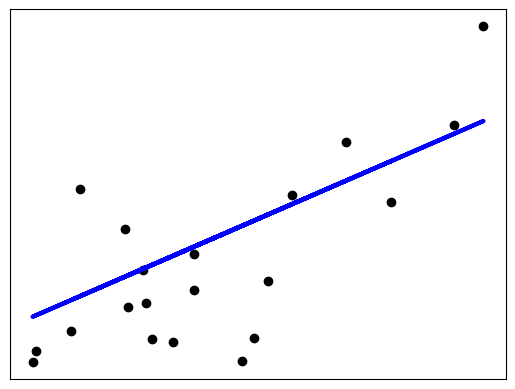

In [62]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Short Overview of the Object Structure of MatPlotLib

In [7]:
# Import releant libs
import matplotlib.pyplot as plt
import numpy as np

# Source: https://realpython.com

matplotlib.figure.Figure

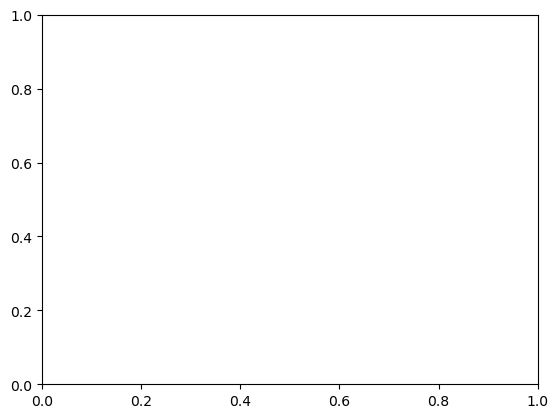

In [8]:
# Create toy plot
fig, _ = plt.subplots() # _ is the "wildcard" variable i.e., throw the content away.  
type(fig)

In [9]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(one_tick)

matplotlib.axis.YTick

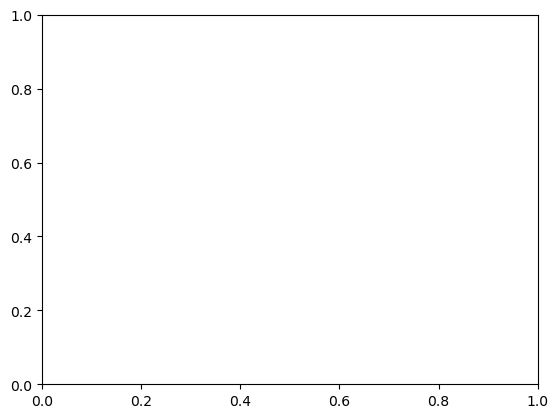

In [10]:
# NOTE: From here on, we work with the stateless (object-orientied approach) to plot figures
# Create fig and ax objects
fig, ax = plt.subplots() # Only time we use pyplot to create the initial objects 

In [11]:
# Subplots
type(ax)

matplotlib.axes._subplots.AxesSubplot

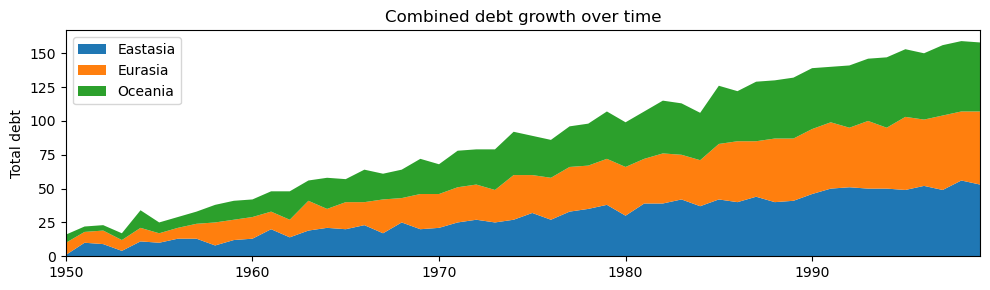

In [10]:
# Create three random time series objects of size (3, 50)
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

# Create fig and ax objects 
fig, ax = plt.subplots(figsize=(10, 3)) # figsize(float, float) - width, height in inches.

# Create a stacked plot object directly
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])

# Set the title of the figure (ax)
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])

fig.tight_layout() # clean up whitespace padding

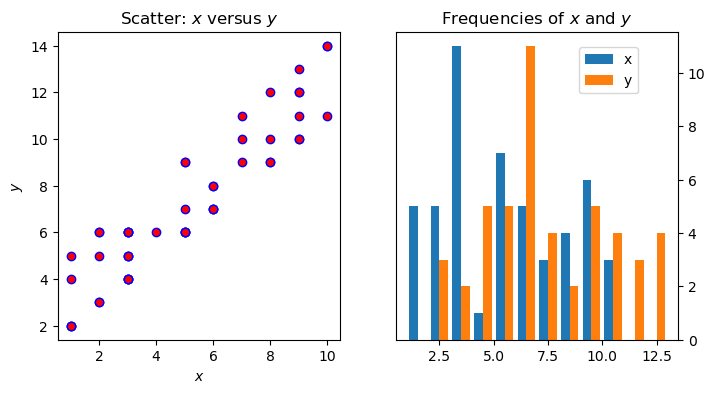

In [12]:
# Create random numbers
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y)) # create tuples based on x and y

# Create figure and TWO axes objects
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Create first figure
ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

## Create second figure
ax2.hist(data, bins=np.arange(data.min(), data.max()),
         label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

# Good luck doing this with pure plt functions....

In [14]:
# Verify tree structure:
(fig.axes[0] is ax1, fig.axes[1] is ax2)

(True, True)

### Working with pure matplotlib objects - More than two axes 

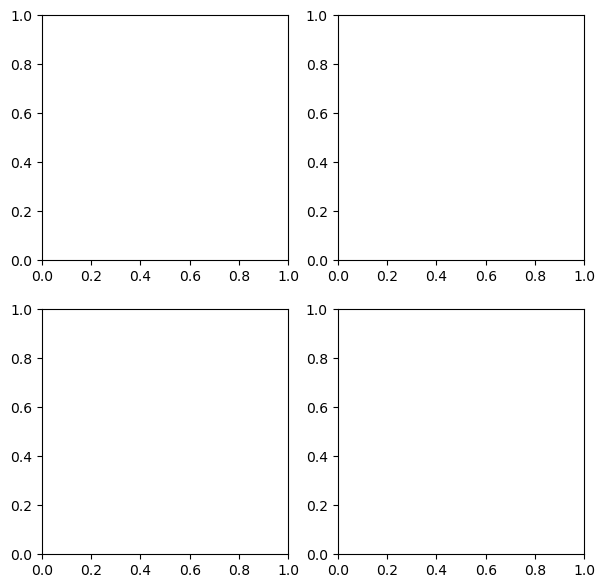

In [15]:
# What do we get by executing this?
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

In [16]:
# We get a 2 dimensional array of axes objects
type(ax)

numpy.ndarray

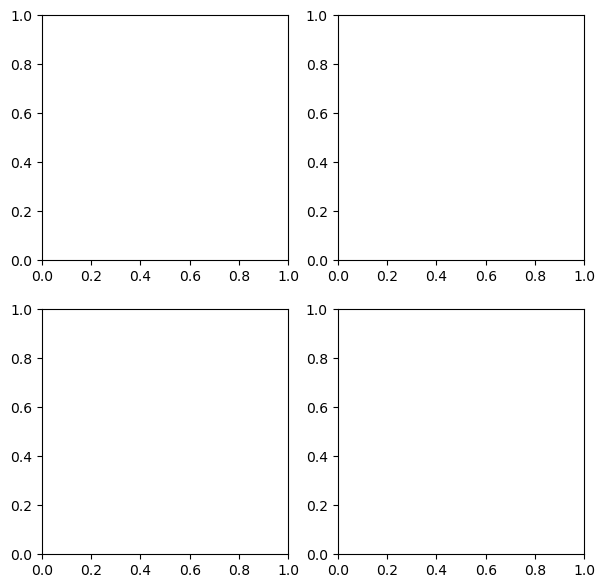

In [17]:
# But working with 2D arrays is annoying...
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
ax1, ax2, ax3, ax4 = ax.flatten()  # flatten a 2d NumPy array to 1d

# Now we can work with each axes object (ax1, ..., ax4) 

## Programming Tasks

### Task 1: pandas
Load the `employee_survey_data.csv` from the `data` directory in the repository root into a DataFrame and find out about the following stats:
* Dimensionality of the data set
* Number of rows with missing values
* Number of employees that are most satisfied with their job (_tip: consider most satisfied to be the relative maximum of all ratings_)

In [4]:
# Read in data
employee_df = pd.read_csv('./data/employee_survey_data.csv')

In [5]:
# a) Get Dimensionality 
employee_df.shape

(4410, 4)

In [6]:
# b) Count rows with at least one NaN value
sum(employee_df.isna().any(axis=1))

83

In [7]:
# c) Find out max satisfcation level
max_satisfaction = employee_df["JobSatisfaction"].max()

In [8]:
# Filter employees by satisfaction level and count
employee_df[employee_df["JobSatisfaction"]==max_satisfaction].shape

(1367, 4)

### Task 2: Plotting
In this task, we want to try and emulate the following plot of the Californa housing price data set, using capabilities of `matplotlib` and optionally `seaborn`:

![Target Visualization](resources/cal_housing_target.png)

The data set is available at a remote resource: http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz
(some documentation is available at https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)

1. Find out what the format of the data set is, when extracted and use that information to load it as a DataFrame directly from the remote resource (_tip: it's not CSV_)
1. Try to recreate a plot similar to the one depicted above.
   1. In the first figure, we can want to render a scatter plot of “age” (Home Age) and “pop” (Population).
   1. In the second plot, we want to visualize a histogram of “age” (Home Age).
   1. Finally, we want to render a plot a histogram of the “pop” (Population).

Follow the template from below with 3 axis objects, and by using subplots:  https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html 
You can use `matplotlib` plotting capabilities on the axis objects (like `ax.plot()`) or the `seaborn` library (https://seaborn.pydata.org/) by passing the axis objects to the plotting functions (like `sns.plot(ax=ax)`), this is up to you.

![Axes Template](resources/axes_template.png)

In [5]:
# extract relevant columns
y = housing[:, -1] 
pop, age = housing[:, [4, 7]].T

In [3]:
# Load some example data
from io import BytesIO
import tarfile
from urllib.request import urlopen
import matplotlib.pyplot as plt

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [14]:
# Define custom set title function 
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.6),
        fontsize=12.5)
    return ax

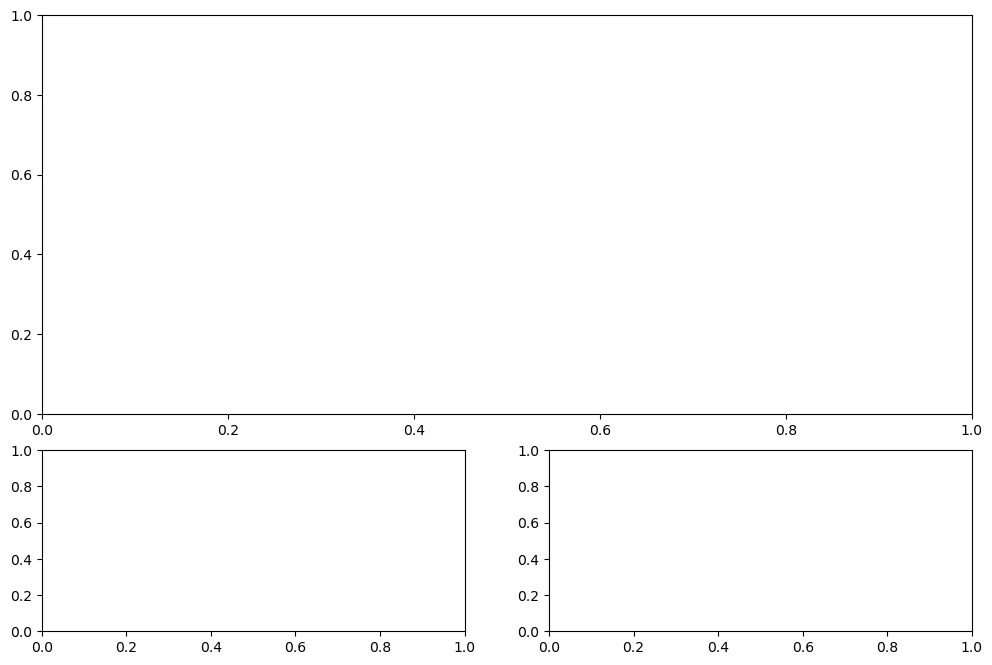

In [26]:
#Matplotlib’s gridspec module allows for more subplot customization. 
#pyplot’s subplot2grid() interacts with this module nicely. Let’s say we want to create a layout like this:

gridsize = (3, 2)  # Grid matrix with 3 rows and 2 columns 

fig = plt.figure(figsize=(12, 8)) # Width, height in inches.

ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2) # Start Location (0, 0)-spans over 2 rows and 2 columns
ax2 = plt.subplot2grid(gridsize, (2, 0)) # Start Location (2, 0) i.e., last row and first column
ax3 = plt.subplot2grid(gridsize, (2, 1)) # Start Location (2, 1) i.e., last row second column

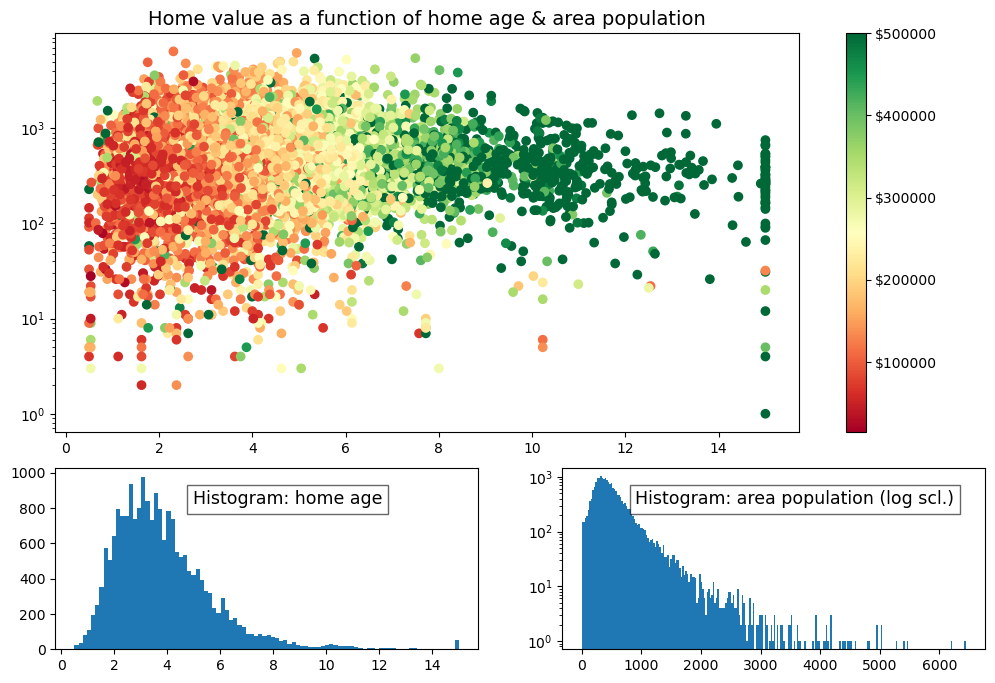

In [27]:
# Plot all three figures with respective axes objects
ax1.set_title('Home value as a function of home age & area population',
              fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn') # Add scatter plot to axes object

# Canvas 
fig.colorbar(sctr, ax=ax1, format='$%d') # Add colorbar to scatter plot (this needs to be done with the fig object)

ax1.set_yscale('log')

######
ax2.hist(age, bins='auto') # Add histogram to axes object
ax3.hist(pop, bins='auto', log=True) # Add histogram to axes object

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

fig